# Continuous Control for Reacher Unity Agent

---

In this notebook, we train the Reacher Unity ML-Agent for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

Please double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
# import necessary functions and network classes
from ACnets import Policy, Critic
from Training import *

using device:  cpu


Make sure that you have downloaded the correct version of the Unity environment and change the `file_name` parameter to match its location.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

In [2]:
os_file = 'Reacher_Windows_x86_64/Reacher.exe'
# os_file = 'Reacher_Linux/Reacher.x86_64' # 'Reacher_Linux_NoVis/Reacher.x86_64'
env = UnityEnvironment(file_name=os_file)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
# size of each action
action_size = brain.vector_action_space_size
# size of the state space 
states = env_info.vector_observations
state_size = states.shape[1]

print('Number of agents:', num_agents)
print('Size of each action:', action_size)
print('vector_observations have shape: ',states.shape)
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('States is type: ',type(states))

Number of agents: 20
Size of each action: 4
vector_observations have shape:  (20, 33)
There are 20 agents. Each observes a state with length: 33
States is type:  <class 'numpy.ndarray'>


In [5]:
# initialize actor and critic 
policy = Policy(state_size, action_size).to(device)
critic = Critic(state_size).to(device)

Actor has input size 33  hidden layer 1 size:  256  hidden layer 2 size:  256  action_size 4
Critic has input size 33  hidden layer 1 size:  256  hidden layer 2 size:  256


In [6]:
mean_rewards, ploss, closs = train(env, policy, critic, 200)
# I need to stabilize learning. Possible ways:
#  1. decrease noise_decay (tested 0.98 but maybe a bit smaller) -> not working
#  2. decrease epsilon to 0.1 -> not working
#  3. implement noise learning -> works!
#--- clipping gradient? not necessary, although performance seems to increase a bit

Episode: 20, score (averaged over agents): 4.087000
Policy loss: -0.07547525316476822 | Critic loss: 0.0019361191662028432
Clipping threshold: 0.19623400697287982


Episode: 40, score (averaged over agents): 11.466500
Policy loss: -0.08042986690998077 | Critic loss: 0.012759514153003693
Clipping threshold: 0.19234638853569805


Episode: 60, score (averaged over agents): 26.411499
Policy loss: -0.07904873043298721 | Critic loss: 0.05562294274568558
Clipping threshold: 0.18853578823286646


Episode: 80, score (averaged over agents): 26.467499
Policy loss: -0.07186614722013474 | Critic loss: 0.08081352710723877
Clipping threshold: 0.18480068024771498


Episode: 100, score (averaged over agents): 30.507499
Policy loss: -0.049771860241889954 | Critic loss: 0.05769617483019829
Clipping threshold: 0.18113956899173356


Episode: 120, score (averaged over agents): 22.148500
Policy loss: -0.053480442613363266 | Critic loss: 0.03832818195223808
Clipping threshold: 0.1775509885057185


Episode: 140, score (averaged over agents): 13.635000
Policy loss: -0.0452914834022522 | Critic loss: 0.015464805997908115
Clipping threshold: 0.17403350187278194


Episode: 160, score (averaged over agents): 16.902500
Policy loss: -0.032860931009054184 | Critic loss: 0.008817280642688274
Clipping threshold: 0.17058570064299086


Episode: 180, score (averaged over agents): 9.218500
Policy loss: 0.03214363381266594 | Critic loss: 0.013469845987856388
Clipping threshold: 0.16720620426940402


Episode: 200, score (averaged over agents): 3.911000
Policy loss: 0.04362114891409874 | Critic loss: 0.0058040134608745575
Clipping threshold: 0.16389365955528246


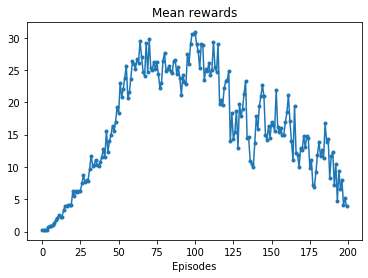

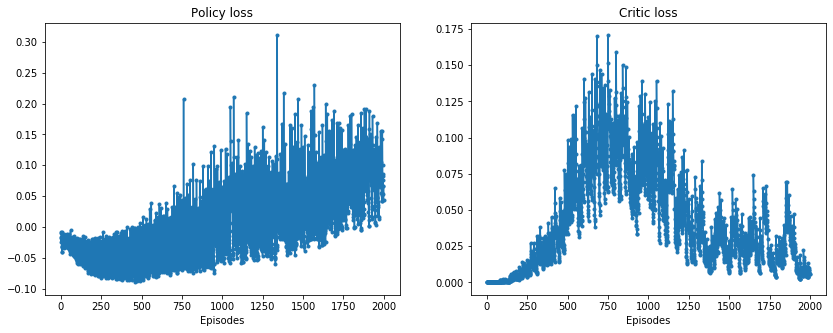

In [9]:
plt.figure()
plt.plot(mean_rewards,'.-')
plt.title("Mean rewards")
plt.xlabel('Episodes')
plt.savefig('Mean_rewards.png')

plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(ploss,'.-')
plt.title("Policy loss")
plt.xlabel('Episodes')
plt.subplot(122)
plt.plot(closs,'.-')
plt.title("Critic loss")
plt.xlabel('Episodes')
plt.savefig('AC_Losses.png')

In [8]:
env.close()